In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
graf_raw = pd.read_csv("data/311_Service_Requests_-_Graffiti_Removal.csv")
build_raw = pd.read_csv("data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")
light_raw = pd.read_csv("data/311_Service_Requests_-_Alley_Lights_Out.csv")
commarea_raw = pd.read_csv("data/CommAreas.csv")

In [5]:
# get rid of duplicates
graf_new = graf_raw[graf_raw['Status'].isin(['Completed', 'Open'])]
light_new = light_raw[light_raw['Status'].isin(['Completed', 'Open'])]

In [6]:
graf = graf_new[['Service Request Number', 'Type of Service Request', 'Creation Date', 'Completion Date', \
                 'What Type of Surface is the Graffiti on?',\
                'Community Area', 'Latitude','Longitude', 'Location']]

In [7]:
build = build_raw[['SERVICE REQUEST NUMBER','SERVICE REQUEST TYPE', 'DATE SERVICE REQUEST WAS RECEIVED', 'DATE SERVICE REQUEST WAS RECEIVED',\
                  'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',\
                  'Community Area', 'LATITUDE', 'LONGITUDE', 'Location']]

In [8]:
light = light_new[['Service Request Number','Type of Service Request','Creation Date', 'Completion Date',\
                  'Status', \
                  'Community Area', 'Latitude', 'Longitude', 'Location']]

In [26]:
build.columns = graf.columns
light.columns = graf.columns
combinedf = pd.concat([graf, build, light], ignore_index=True)
combinedf.rename(columns={'What Type of Surface is the Graffiti on?':'Subtype'}, inplace=True)

In [41]:
commarea = commarea_raw[['AREA_NUMBE', 'COMMUNITY']].rename(columns={'AREA_NUMBE':'Community Area', \
                                                                     'COMMUNITY':'Neighborhood'})
combinedf_area = pd.merge(combinedf, commarea, how='right', on='Community Area')

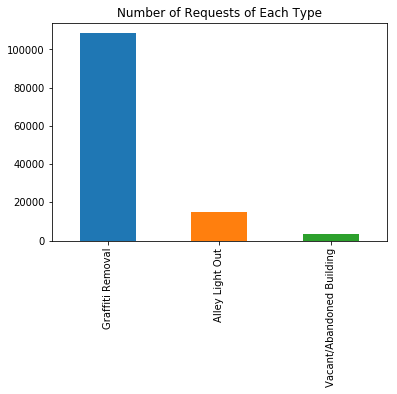

In [51]:
# summary stats for number of requests of each type
req_type = combinedf["Type of Service Request"].value_counts()
req_type.plot(kind="bar", title="Number of Requests of Each Type")

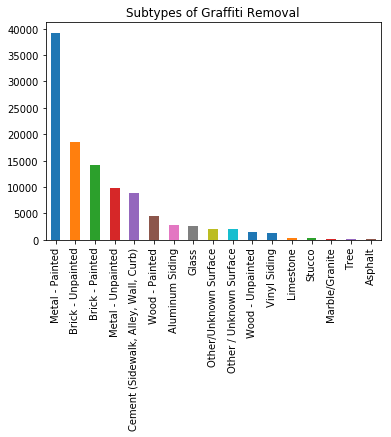

In [54]:
# summary stats for graffiti subtypes
graf_subtype = combinedf[combinedf["Type of Service Request"]=='Graffiti Removal']['Subtype'].value_counts()
graf_subtype.plot(kind="bar", title="Subtypes of Graffiti Removal")

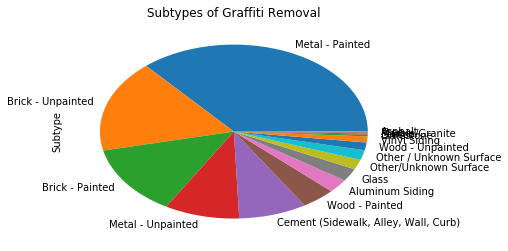

In [63]:
graf_subtype.plot(kind="pie", title="Subtypes of Graffiti Removal")

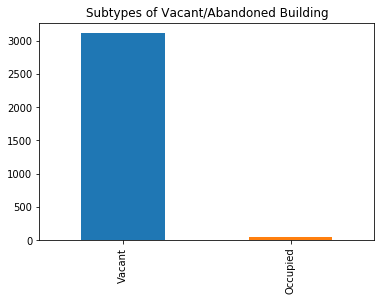

In [58]:
# summary stats for vacant building subtypes
build_subtype = combinedf[combinedf["Type of Service Request"]=='Vacant/Abandoned Building']['Subtype'].value_counts()
build_subtype.plot(kind="bar", title="Subtypes of Vacant/Abandoned Building")

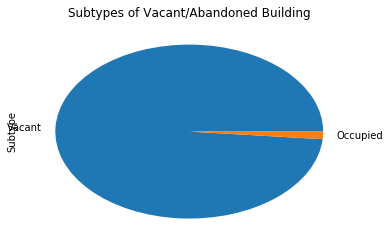

In [60]:
build_subtype.plot(kind="pie", title="Subtypes of Vacant/Abandoned Building")

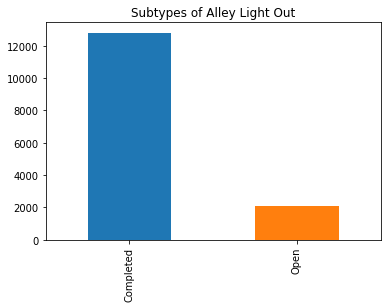

In [65]:
# summary stats for lights out subtypes
light_subtype = combinedf[combinedf["Type of Service Request"]=='Alley Light Out']['Subtype'].value_counts()
light_subtype.plot(kind="bar", title="Subtypes of Alley Light Out")

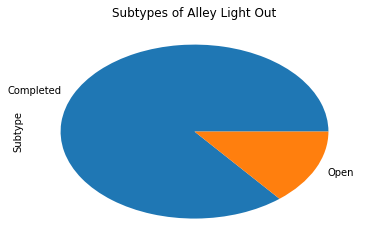

In [66]:
light_subtype.plot(kind="pie", title="Subtypes of Alley Light Out")